In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
store_df = pd.read_csv('Data/wallmart_data/stores.csv')
features_df = pd.read_csv('Data/wallmart_data/features.csv')
train_df = pd.read_csv('Data/wallmart_data/train.csv')

# Sales Performance Analysis with Walmart Data:

## Objective🎯:

##### Analyze sales performance across different stores and departments. Use groupby to find trends and combine data using merging and concatenation techniques.

### Step 1: Understand the Data:

#### 1. Checking the data for each data frame:

#### 1.1 Store Dataframe

In [4]:
store_df

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875
5,6,A,202505
6,7,B,70713
7,8,A,155078
8,9,B,125833
9,10,B,126512


In [96]:
store_df['Type'].value_counts()

Type
A    22
B    17
C     6
Name: count, dtype: int64

In [5]:
# Check structure and types:
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


##### Contains data for the store quantity, store type and store size.
**The store dataframe contains 3 columns:**
1. Store column int datatype
2. Store Type column object datatype
3. Store Size column int datatype

In [6]:
# Stats checking
store_df.describe()

,Store,Size
count,45.000000,45.000000
mean,23.000000,130287.600000
std,13.133926,63825.271991
min,1.000000,34875.000000
25%,12.000000,70713.000000
50%,23.000000,126512.000000
75%,34.000000,202307.000000
max,45.000000,219622.000000


In [7]:
# Check structure and types:
store_df.isnull().sum()

Store    0
Type     0
Size     0
dtype: int64

#### 1.2 features Dataframe

In [8]:
features_df

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False


In [9]:
# Check structure and types:
features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


##### Contains the data for the stores themselves and their department, and the region for the given date (Base on date)
**The features dataframe contains 12 columns:**
1. Store (Store Number)
2. Date (the week)
3. Temperature (avg temperature in the region)
4. Fuel_price (cost of fuel in the region)
5. MarkDown 1-5 (Promotion record)
6. <img src="Data/wallmart_data/MarkDown.png" width="270">
7. CPI (the consumer price index)
8. Unemployment (the unemployment rate)
9. IsHoliday (whether the week is a special holiday week)

In [10]:
# Stats checking
features_df.describe()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,8190.000000,8190.000000,8190.000000,4032.000000,2921.000000,3613.000000,3464.000000,4050.000000,7605.000000,7605.000000
mean,23.000000,59.356198,3.405992,7032.371786,3384.176594,1760.100180,3292.935886,4132.216422,172.460809,7.826821
std,12.987966,18.678607,0.431337,9262.747448,8793.583016,11276.462208,6792.329861,13086.690278,39.738346,1.877259
min,1.000000,-7.290000,2.472000,-2781.450000,-265.760000,-179.260000,0.220000,-185.170000,126.064000,3.684000
25%,12.000000,45.902500,3.041000,1577.532500,68.880000,6.600000,304.687500,1440.827500,132.364839,6.634000
50%,23.000000,60.710000,3.513000,4743.580000,364.570000,36.260000,1176.425000,2727.135000,182.764003,7.806000
75%,34.000000,73.880000,3.743000,8923.310000,2153.350000,163.150000,3310.007500,4832.555000,213.932412,8.567000
max,45.000000,101.950000,4.468000,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000,228.976456,14.313000


In [11]:
# Checking the Null if Available
features_df.isnull().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

#### 1.3 train Dataframe

In [12]:
train_df

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False
...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False
421566,45,98,2012-10-05,628.10,False
421567,45,98,2012-10-12,1061.02,False
421568,45,98,2012-10-19,760.01,False


In [13]:
# Check structure and types:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


##### This dataset includes historical records (past data) for training your model or performing analysis
**The store dataframe contains 5 columns:**
1. Store (the store number)
2. Dept  (the department number)
3. Date  (the week)
4. Weekly_Sales (sales for the given department in the given store)
5. IsHoliday (whether the week is a special holiday week)

In [14]:
# Stats checking
train_df.describe()

,Store,Dept,Weekly_Sales
count,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123
std,12.785297,30.492054,22711.183519
min,1.000000,1.000000,-4988.940000
25%,11.000000,18.000000,2079.650000
50%,22.000000,37.000000,7612.030000
75%,33.000000,74.000000,20205.852500
max,45.000000,99.000000,693099.360000


In [15]:
# Checking the Null if Available
train_df.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

In [17]:
train_df.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday'], dtype='object')

# After understanding the data, now we are going to apply the task requirement.

### Aggregation with groupby() (e.g. total sales by store or department):

#### We are going to create scenarios to practice the Aggregations:

##### 1. How many unique departments does each store have, and how many stores belong to each store type?

In [102]:
dept_count = train_df.groupby('Store')['Dept'].nunique()
store_type = store_df.groupby("Type")['Store'].nunique()

##### Visualize the above:

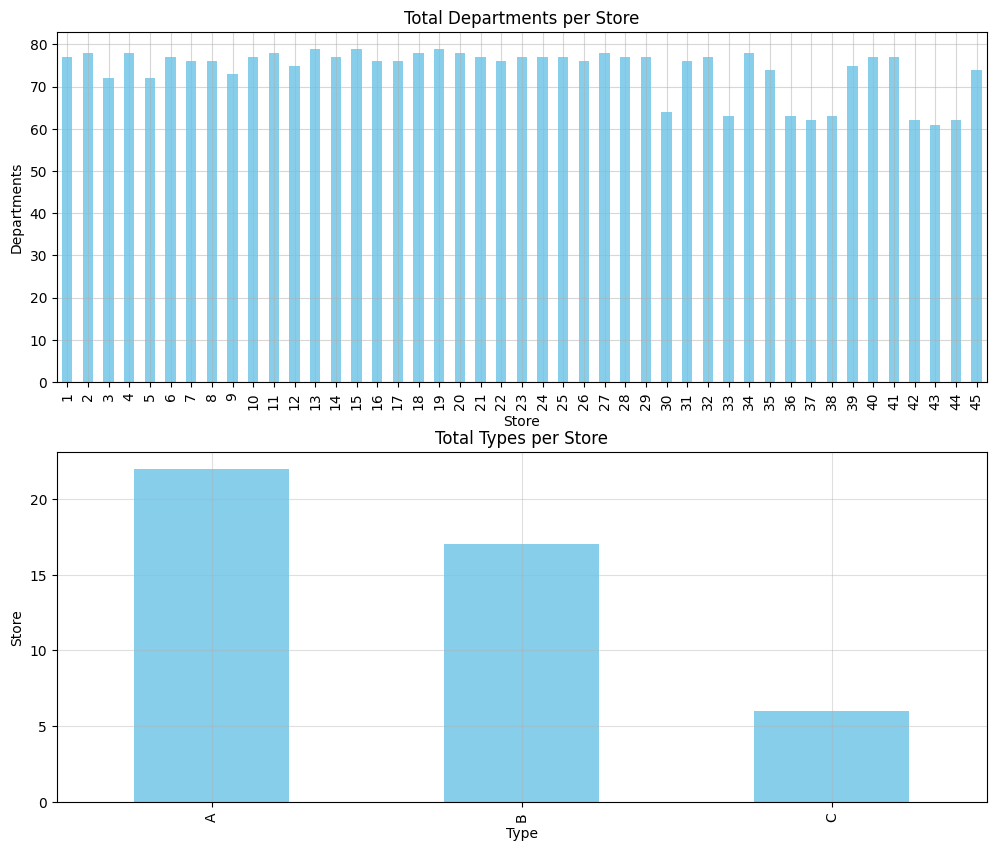

In [109]:
fig, axes = plt.subplots(2, figsize = (12, 10))

# Plot department count
dept_count.plot(kind = 'bar', ax = axes[0], color = 'skyblue')
axes[0].set_title("Total Departments per Store")
axes[0].set_ylabel("Departments")
axes[0].grid(True, alpha = 0.5)

# Plot store type
store_type.plot(kind = 'bar', ax = axes[1], color = 'skyblue')
axes[1].set_title("Total Types per Store")
axes[1].set_ylabel("Store")
axes[1].grid(True, alpha = 0.4)

##### 2. Which departments generate the highest total sales across all stores during the full time period?

In [110]:
dept_sales = train_df.groupby('Dept')['Weekly_Sales'].sum().round(0).astype(int)
dept_sales

Dept
1     123638777
2     280611174
3      75892450
4     167146746
5     135607359
        ...    
95    449320163
96     73833916
97     89496512
98     39828919
99       358150
Name: Weekly_Sales, Length: 81, dtype: int64

### Merging different datasets (e.g. sales with features):

##### Step 1: Creating a new dataframe from the store dataframe that take two different columns:

In [118]:
new_store_df = store_df['Store']
type_df = store_df[['Type', 'Store']]

What i did is i have new 2 variables and each one stores a column from the store dataframe

##### Step 2: Merging the two columns to come up with the one new dataframe:

In [121]:
new_sales_type_df = pd.merge(type_df, new_store_df, on = 'Store', how = 'inner')
new_sales_type_df

,Type,Store
0,A,1
1,A,2
2,B,3
3,A,4
4,B,5
5,A,6
6,B,7
7,A,8
8,B,9
9,B,10


So this is the new dataframe using the merge method, this dataframe explains for each type how many stores contain.

##### Creating a new dataframe from two different dataframe (Store & Train) using Merge:

In [126]:
store_train_df = pd.merge(store_df, train_df, on = 'Store', how = 'left')
store_train_df.head(5)

,Store,Type,Size,Dept,Date,Weekly_Sales,IsHoliday
0,1,A,151315,1,2010-02-05,24924.50,False
1,1,A,151315,1,2010-02-12,46039.49,True
2,1,A,151315,1,2010-02-19,41595.55,False
3,1,A,151315,1,2010-02-26,19403.54,False
4,1,A,151315,1,2010-03-05,21827.90,False


So these are the new dataframe using merge two different dataframe.

### Concatenating data (e.g. appending data from different weeks)

##### Step 1: Creating 2 new dataframe from the train dataframe then we will concatenate the by axis=0:

In [135]:
up_part_train_df = train_df[ : 10]
bottom_part_train_df = train_df[ 10 : 20]

What i did is i have new 2 variables and each one stores a dataframe from the train dataframe

##### Step 2: Concat the two created dataframes to come up with a new dataframe:

In [137]:
new_train_df = pd.concat([up_part_train_df, bottom_part_train_df], axis = 0)
new_train_df

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False
5,1,1,2010-03-12,21043.39,False
6,1,1,2010-03-19,22136.64,False
7,1,1,2010-03-26,26229.21,False
8,1,1,2010-04-02,57258.43,False
9,1,1,2010-04-09,42960.91,False


So these is a new dataframe using concat method.

##### Creating 2 new dataframe from the train & store dataframe then we will concatenate the by axis=1:

In [146]:
new_store_df = store_df['Type']
new_mix_train_and_store_df = train_df[['Dept', 'Date', 'IsHoliday']]

What i did is i have new 2 variables and one stores the only "Type" from store dataframe and the other one stores the "Dept", "Date, "IsHoliday" from the train dataframe.

In [148]:
mixed_train_store_df = pd.concat([new_store_df, new_mix_train_and_store_df], axis = 1)
mixed_train_store_df

,Type,Dept,Date,IsHoliday
0,A,1,2010-02-05,False
1,A,1,2010-02-12,True
2,B,1,2010-02-19,False
3,A,1,2010-02-26,False
4,B,1,2010-03-05,False
...,...,...,...,...
421565,NaN,98,2012-09-28,False
421566,NaN,98,2012-10-05,False
421567,NaN,98,2012-10-12,False
421568,NaN,98,2012-10-19,False
